In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.decomposition import PCA


In [17]:
df = pd.read_csv("churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [19]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [20]:
y

,Churn
0,False
1,False
2,False
3,False
4,False
...,...
2661,False
2662,False
2663,False
2664,False


In [21]:
categorical_cols = ['State','International plan','Voice mail plan']
numerical_cols = X.drop(columns=categorical_cols).columns

In [22]:
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])

In [23]:
svm_linear = Pipeline(
    steps=[('preprocessing', preprocessor),('classifier', SVC(kernel='linear', probability=True))])
svm_rbf = Pipeline(
    steps=[('preprocessing', preprocessor),('classifier', SVC(kernel='rbf', probability=True))])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [25]:
X_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1396,HI,146,510,No,No,0,189.3,77,32.18,155.9,128,13.25,186.0,83,8.37,7.4,3,2.00,0
542,CO,71,415,No,No,0,277.5,104,47.18,131.8,121,11.20,126.9,101,5.71,8.2,2,2.21,1
2275,VA,99,510,No,No,0,128.3,78,21.81,215.3,120,18.30,143.7,140,6.47,14.3,9,3.86,2
1302,TN,68,415,No,No,0,222.8,99,37.88,175.8,85,14.94,202.0,111,9.09,11.0,3,2.97,3
560,SD,168,415,No,Yes,22,175.9,70,29.90,211.7,105,17.99,174.5,81,7.85,7.3,5,1.97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,WI,143,510,No,No,0,194.3,99,33.03,123.6,133,10.51,229.5,99,10.33,10.2,2,2.75,2
51,CA,116,415,No,Yes,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2
1197,MO,22,408,No,Yes,14,199.1,100,33.85,221.8,103,18.85,65.7,91,2.96,4.2,1,1.13,1
2271,NM,147,408,Yes,No,0,183.8,113,31.25,164.7,110,14.00,111.0,87,5.00,10.1,4,2.73,1


In [26]:
X_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1229,MD,102,415,No,No,0,271.1,80,46.09,172.0,133,14.62,169.2,105,7.61,10.3,5,2.78,1
2001,MT,157,408,No,No,0,240.2,67,40.83,153.0,98,13.01,249.0,72,11.21,10.2,6,2.75,2
1421,TX,79,415,No,No,0,144.0,90,24.48,135.8,91,11.54,212.4,129,9.56,13.0,4,3.51,1
1346,NM,132,408,No,No,0,169.9,107,28.88,209.4,121,17.80,206.1,79,9.27,11.5,2,3.11,1
86,AZ,95,408,No,No,0,238.1,65,40.48,187.2,98,15.91,190.0,115,8.55,11.8,4,3.19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,MD,70,408,No,No,0,170.2,98,28.93,155.2,102,13.19,228.6,76,10.29,15.0,2,4.05,1
104,MS,61,510,No,Yes,27,187.5,124,31.88,146.6,103,12.46,225.7,129,10.16,6.4,6,1.73,4
377,AL,41,510,No,Yes,34,194.4,63,33.05,254.9,110,21.67,160.2,115,7.21,17.2,9,4.64,2
1123,AL,96,415,Yes,No,0,200.6,117,34.10,289.5,120,24.61,98.3,95,4.42,11.2,5,3.02,2


In [27]:
y_train

,Churn
1229,False
2001,False
1421,False
1346,False
86,False
...,...
66,False
104,True
377,False
1123,False


In [28]:
y_test

,Churn
1396,False
542,False
2275,False
1302,False
560,False
...,...
1728,False
51,False
1197,False
2271,False


In [29]:
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', SVC(probability=True))])

In [30]:
svm_linear

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', SVC(kernel='linear', probability=True))])

In [31]:
svm_rbf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', SVC(probability=True))])

In [32]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("AUC      :", roc_auc_score(y_test, y_prob))

In [33]:
print("Linear Kernel Performance")
evaluate_model(svm_linear, X_test, y_test)

Linear Kernel Performance
Accuracy : 0.848314606741573
Precision: 0.43478260869565216
Recall   : 0.1282051282051282
AUC      : 0.7314721097615835


In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessor.fit_transform(X))
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_train_pca, y_train_pca)


SVC()

In [35]:
svm_vis

SVC()

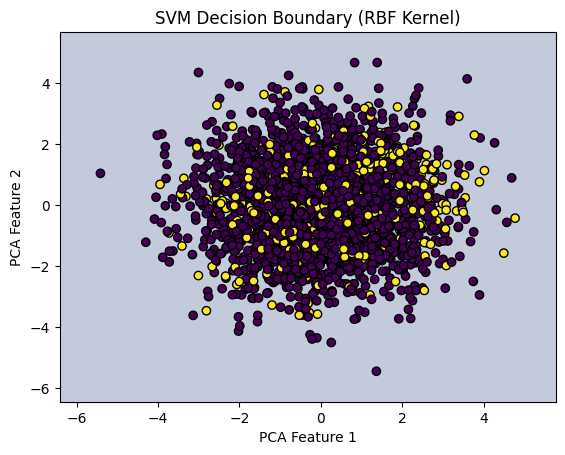

In [36]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid( np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()
